In [1]:
import os
import collections

from shapely import geometry

from matplotlib import pyplot as plt

from mintpy.objects.euler_pole import (ITRF2014_PMM, MASY2DMY, PLATE_BOUNDARY_FILE, 
                                       EulerPole, 
                                       sph2cart, read_plate_outline, plot_plate_motion)

# Make a globe map with a location of interest

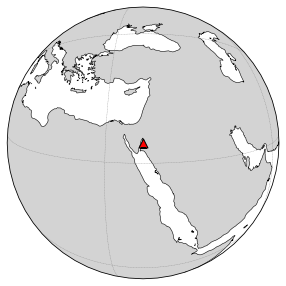

In [2]:
# ====================================================
# Plot the globe without plate, only show the region
# ====================================================
kwargs = {
            'pts_lalo' : [29, 35],   # [lat, lon] of the location
            'pts_ms'   : 80          # marker size
         }

fig, ax = plot_plate_motion(False, False, center_lalo=[29, 35], zoom=30, dpi=100, outfile='aqaba_globe', **kwargs)
plt.show()


## Euler rotation of the Arabia plate

assume a spheroidal Earth as defined in WGS84


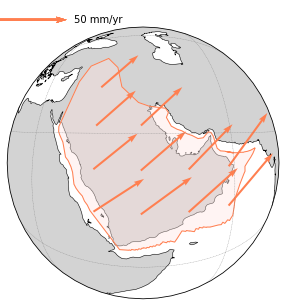

In [4]:
# ===============================
# Read plate boundary
# ===============================
# Read Boundaries polygon file
plate_poly = read_plate_outline('GSRM', 'Arabia')


# ===============================
# Euler pole from ITRF2014
# ===============================
# plate motion of a plate of interest
pmm = ITRF2014_PMM['Arabia']
plate_arab = EulerPole(wx=pmm.omega_x, wy=pmm.omega_y, wz=pmm.omega_z, unit='mas/yr')


# ==================================
# Plot the globe with plate motion
# ==================================
kwargs = {'Nq': 6}  # approx number of quivers in lat,lon directions
fig, ax = plot_plate_motion(plate_poly, plate_arab, qscale=200, unit_q=50, zoom=80, dpi=100, outfile=None, **kwargs)
plt.show()


## Relative motion between Arabia & Nubia

assume a spheroidal Earth as defined in WGS84


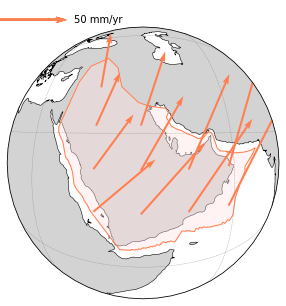

In [5]:
# plate motion of a plate of interest
pmm = ITRF2014_PMM['Nubia']
plate_nubi = EulerPole(wx=pmm.omega_x, wy=pmm.omega_y, wz=pmm.omega_z, unit='mas/yr')


# relative motion between two plates
plate_ar_nu = plate_arab - plate_nubi


# Plot the globe with plate motion
kwargs = {'Nq': 6}  # approx number of quivers in lat,lon directions
fig, ax = plot_plate_motion(plate_poly, plate_ar_nu, qscale=50, unit_q=10, zoom=80, dpi=100, outfile=None, **kwargs)
plt.show()


## Relative motion between Arabia & Sinai

(0.8478886087323123, -0.18332000605338197, 1.2251857502283363) mas per yr
assume a spheroidal Earth as defined in WGS84


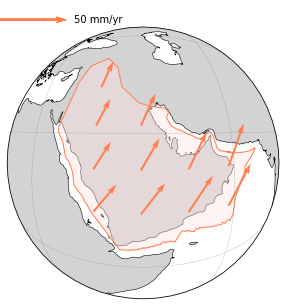

In [6]:
# Read Euler pole of Sinai plate in ITRF2014 from the paper of Castro-Perdomo et al., 2022
print(sph2cart(54.7, 347.8, r=0.417/MASY2DMY), 'mas per yr')


# Create this new custom subplate
Tag = collections.namedtuple('Tag', 'Abbrev num_site omega_x omega_y omega_z omega wrms_e wrms_n')
ITRF2014_PMM['Sinai'] = Tag('SINA', -999, 0.848, -0.183, 1.225,  0.0,  0.0,  0.0)


# create Sinai plate Euler pole object
pmm = ITRF2014_PMM['Sinai']
plate_sinai = EulerPole(wx=pmm.omega_x, wy=pmm.omega_y, wz=pmm.omega_z, unit='mas/yr')


# relative motion between two plates
plate_ar_si = plate_arab - plate_sinai


# Plot the globe with plate motion
kwargs = {'Nq': 6}  # approx number of quivers in lat,lon directions
fig, ax = plot_plate_motion(plate_poly, plate_ar_si, qscale=50, unit_q=10, zoom=80, dpi=100, outfile=None, **kwargs)
plt.show()
